In [2]:
import webbrowser as wb
wb.open("https://www.scaler.com/academy/mentee-dashboard/class/83716/project/problems/17972?navref=cl_tt_crd_sl")
path=!cd
import os
os.startfile(path[0]+'\\Other')

**Understand Business Problem**


In [57]:
import pandas as pd
df = pd.read_csv('Data_Jamboree.csv')
df

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...,...
495,496,332,108,5,4.5,4.0,9.02,1,0.87
496,497,337,117,5,5.0,5.0,9.87,1,0.96
497,498,330,120,5,4.5,5.0,9.56,1,0.93
498,499,312,103,4,4.0,5.0,8.43,0,0.73


In [62]:
df.columns = df.columns.str.lower()
df.columns = df.columns.str.replace(' ','_')
df.columns

Index(['serial_no.', 'gre_score', 'toefl_score', 'university_rating', 'sop',
       'lor_', 'cgpa', 'research', 'chance_of_admit_'],
      dtype='object')

In [63]:
df.rename(columns={'chance_of_admit_':'chance_of_admit'}, inplace=True)
df.rename(columns={'lor_':'lor'}, inplace=True)

In [64]:
df.drop(columns=['serial_no.'], inplace=True)

In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         500 non-null    int64  
 1   GRE Score          500 non-null    int64  
 2   TOEFL Score        500 non-null    int64  
 3   University Rating  500 non-null    int64  
 4   SOP                500 non-null    float64
 5   LOR                500 non-null    float64
 6   CGPA               500 non-null    float64
 7   Research           500 non-null    int64  
 8   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 35.3 KB


In [6]:
df=df.convert_dtypes()
df.info()
# Misssing val columns
# Check Dtype change if needed 
# df['date'] = pd.to_datetime(df['date'])

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gre_score          500 non-null    Int64  
 1   toefl_score        500 non-null    Int64  
 2   university_rating  500 non-null    Int64  
 3   sop                500 non-null    Float64
 4   lor                500 non-null    Float64
 5   cgpa               500 non-null    Float64
 6   research           500 non-null    Int64  
 7   chance_of_admit    500 non-null    Float64
dtypes: Float64(4), Int64(4)
memory usage: 35.3 KB


In [7]:
df.describe().round(2)

,gre_score,toefl_score,university_rating,sop,lor,cgpa,research,chance_of_admit
count,500.0,500.0,500.0,500.0,500.0,500.0,500.0,500.0
mean,316.47,107.19,3.11,3.37,3.48,8.58,0.56,0.72
std,11.3,6.08,1.14,0.99,0.93,0.6,0.5,0.14
min,290.0,92.0,1.0,1.0,1.0,6.8,0.0,0.34
25%,308.0,103.0,2.0,2.5,3.0,8.13,0.0,0.63
50%,317.0,107.0,3.0,3.5,3.5,8.56,1.0,0.72
75%,325.0,112.0,4.0,4.0,4.0,9.04,1.0,0.82
max,340.0,120.0,5.0,5.0,5.0,9.92,1.0,0.97


In [26]:
df.nunique()
# Identity Records Columns

gre_score             49
toefl_score           29
university_rating      5
sop                    9
lor                    9
cgpa                 184
research               2
chance_of_admit       61
dtype: int64

In [59]:
df.dropna(inplace=True)

In [10]:
# df.groupby('date')['driver_id'].nunique().sort_index(ascending=True)

**Understand the data**
- No categorical Column
- Granularity
  Data has records of 24 days of each month in 2 year containg drivers montly earning.
- Data also contails details of driver.
    
    Fixed info = Driver ID, Gender, City, Education, joiningdesignation, joiningdate, Lastdate
    
    Variabel info (based on date) = Income, Grade, Rating (deciding factors of target)

In [15]:
df['university_rating'].value_counts(normalize=True,dropna=False).round(2).sort_index()
# NaN can be filled with KNN

1       0.07
2       0.25
3       0.32
4       0.21
5       0.15
<NA>     0.0
Name: university_rating, dtype: Float64

In [13]:
df['research'].value_counts(normalize=True,dropna=False)
# NaN can be filled with KNN

1       0.56
0       0.44
<NA>     0.0
Name: research, dtype: Float64

In [16]:
# df.groupby('driver_id')['education_level'].nunique().sort_values(ascending=False)

In [ ]:
# # Function to impute missing values based on column type if missing value are between 0-10%
# def impute_missing_values(df):
#     for col in df.columns[df.isna().mean() > 0]:  # Columns with missing values
#         if df[col].dtype == 'object':  # Categorical columns
#             df[col].fillna(df[col].mode()[0], inplace=True)  # Impute mode
#         elif pd.api.types.is_numeric_dtype(df[col]):  # Numeric columns
#             df[col].fillna(df[col].mean(), inplace=True)  # Impute mean
#         else:
#             print(f"Column {col} has an unsupported data type for imputation.")
#     return df

# # Apply the function
# df = impute_missing_values(df)

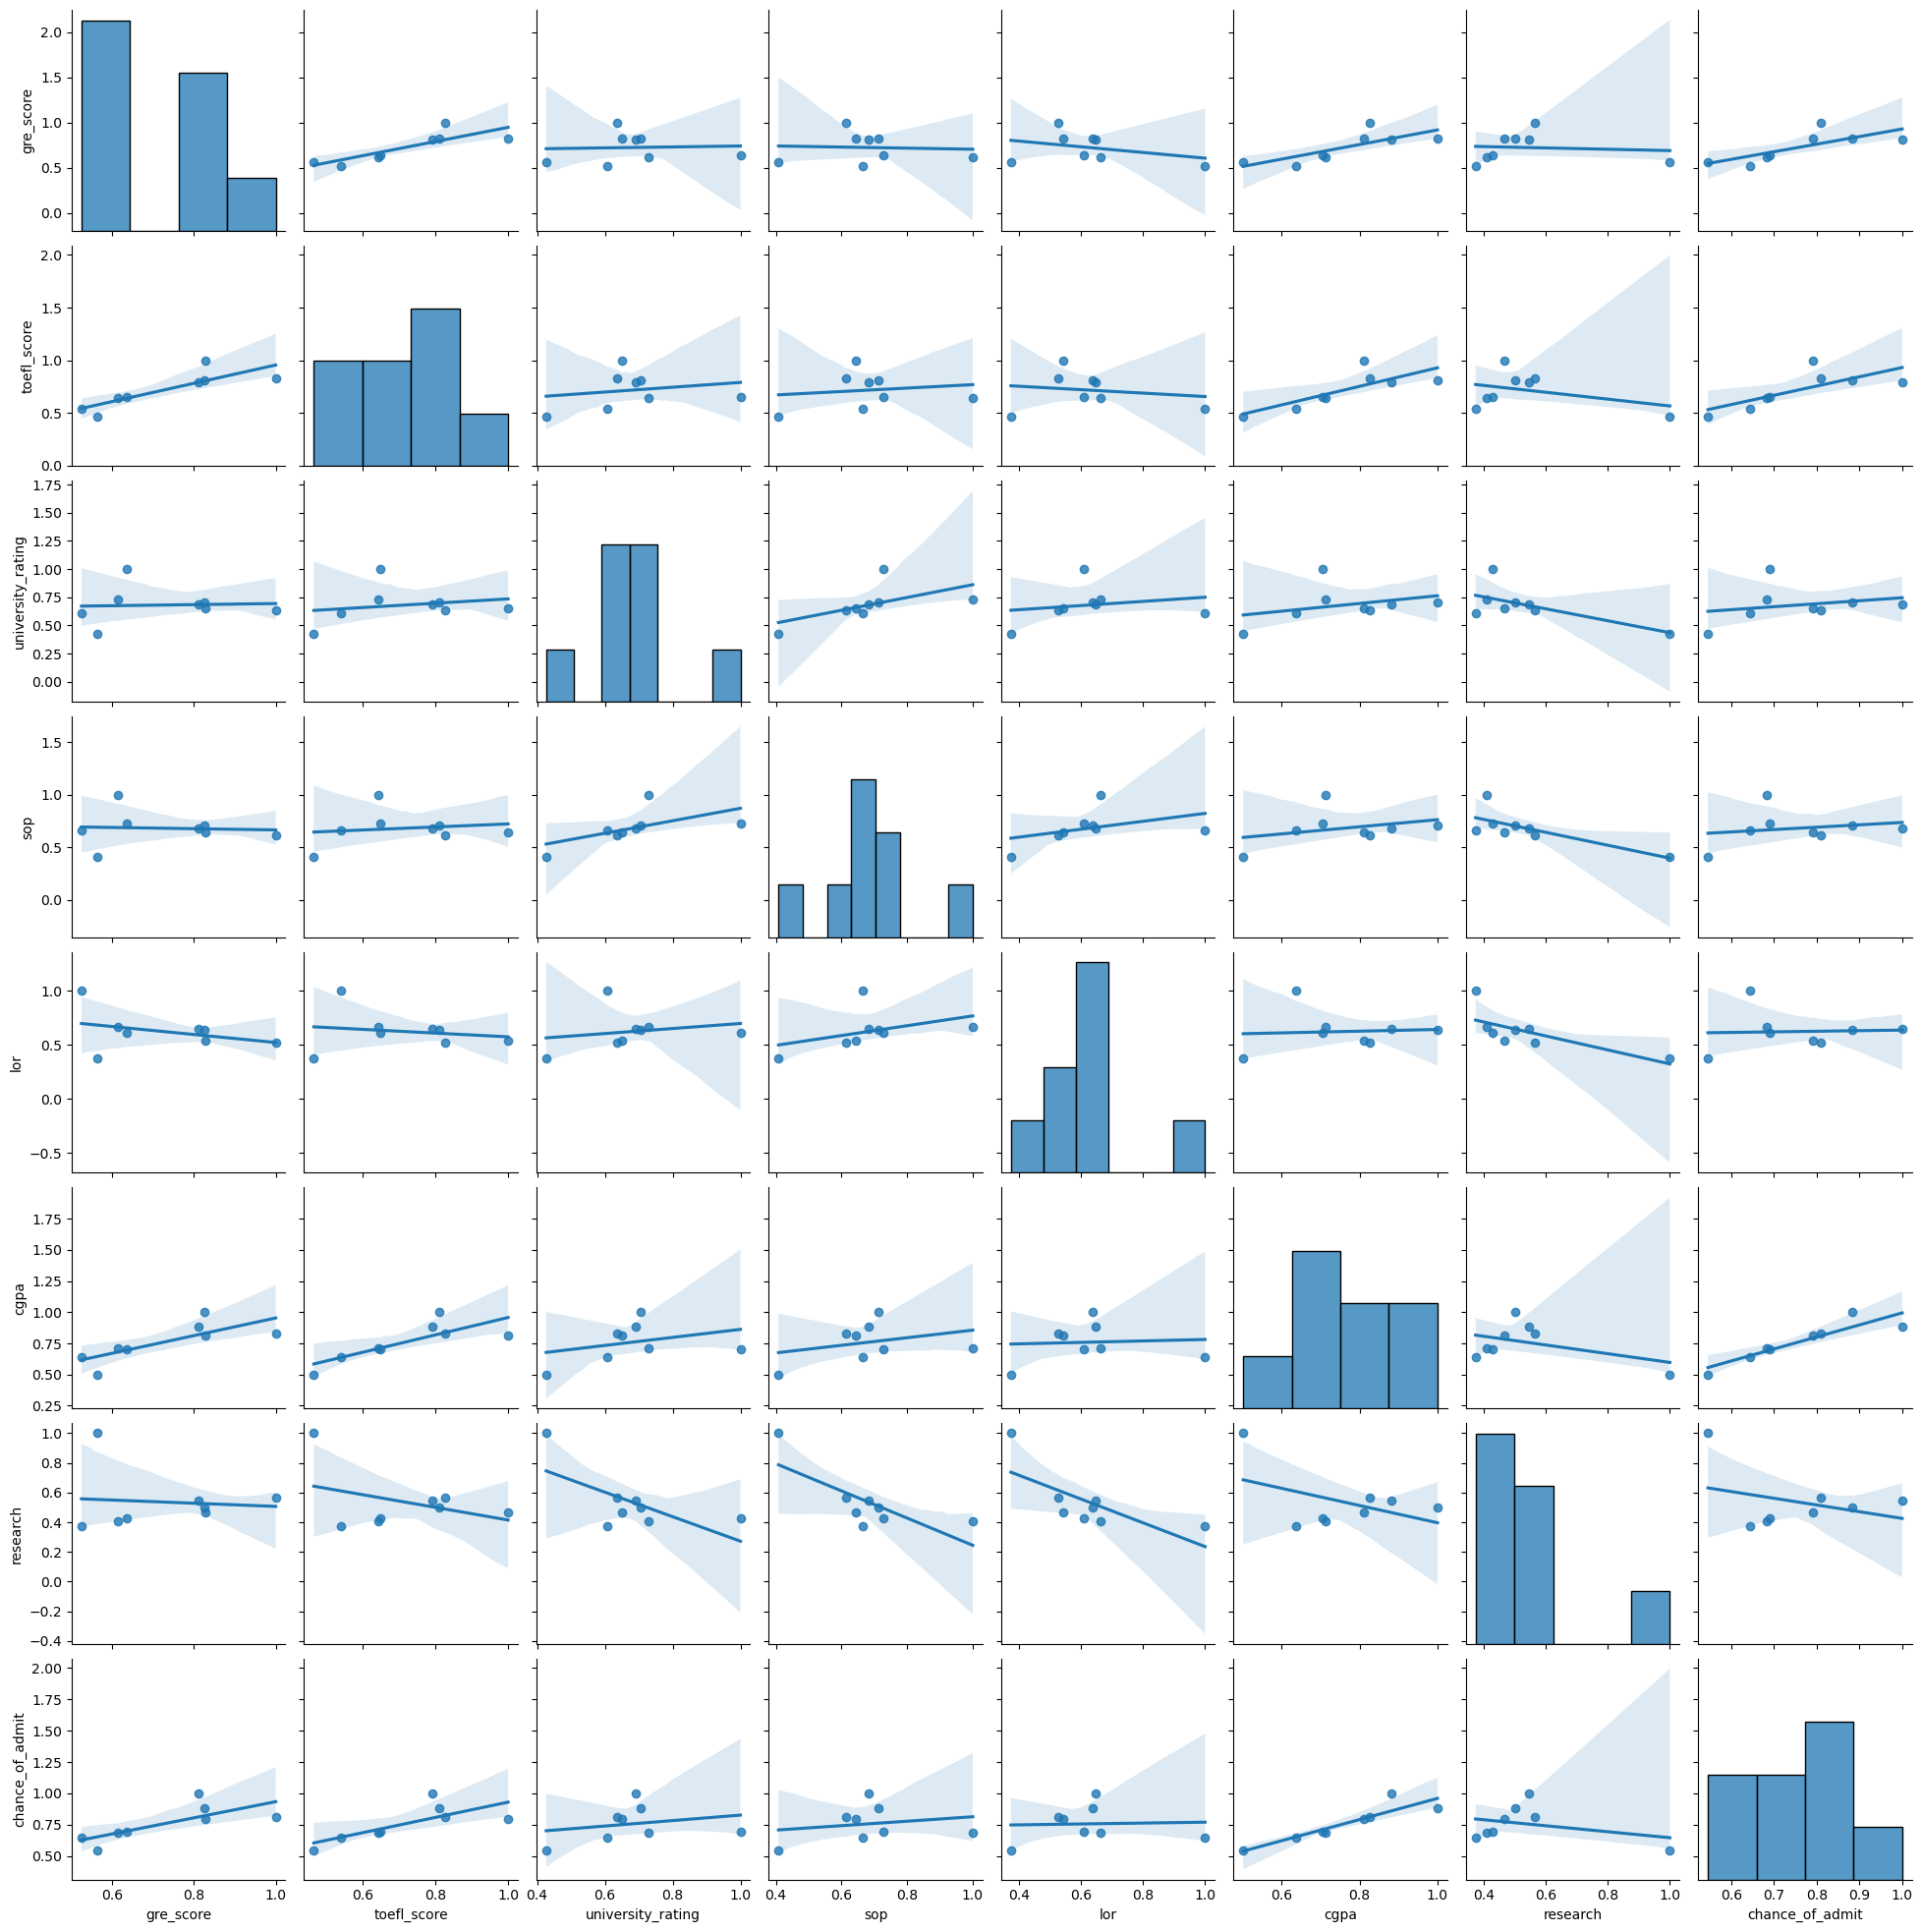

In [6]:
sns.pairplot(df.corr(),kind= 'reg')

In [ ]:
plt.figure(figsize=(9,7))
sns.heatmap(df.corr(),annot=True,cmap = "Blues")

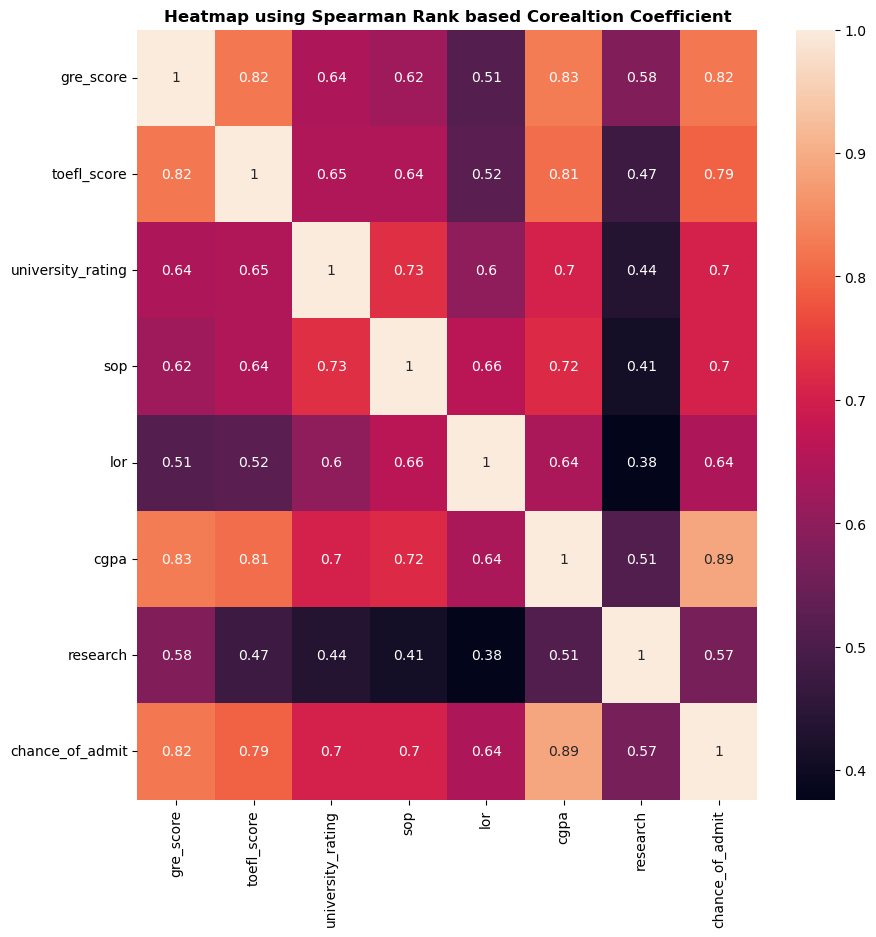

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns

numeric_df = df.select_dtypes(include=['number'])

plt.figure(figsize = (10,10))
sns.heatmap(numeric_df.corr(method = 'spearman'),annot=True)
plt.title(f"Heatmap using Spearman Rank based Corealtion Coefficient", fontweight = 'bold')
plt.show()

In [50]:
X = df.drop(['chance_of_admit'], axis = 1)
y = df['chance_of_admit']

In [51]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,
                                                    test_size=0.25,
                                                    random_state=42)

In [52]:
from sklearn.linear_model import LinearRegression

In [55]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score
y_pred = model.predict(X_test)
print(mean_squared_error(y_test, y_pred))
print(r2_score(y_test, y_pred))

0.003585730291612243
0.8163213016062121


In [10]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import figure
import warnings
warnings.filterwarnings('ignore')
import statsmodels.api as sm

In [8]:
def detect_outliers(data):
     length_before = len(data)
     Q1 = np.percentile(data,25)
     Q3 = np.percentile(data,75)
     IQR = Q3-Q1
     upperbound = Q3+1.5*IQR
     lowerbound = Q1-1.5*IQR
     if lowerbound < 0:
         lowerbound = 0
    
     length_after = len(data[(data>lowerbound)&(data<upperbound)])
     return f"{np.round((length_before-length_after)/length_before,4)} % Outliers data from input data found"

In [11]:
for col in df.columns:
 print(col," : ",detect_outliers(df[col]))

gre_score  :  0.0 % Outliers data from input data found
toefl_score  :  0.0 % Outliers data from input data found
university_rating  :  0.0 % Outliers data from input data found
sop  :  0.0 % Outliers data from input data found
lor  :  0.024 % Outliers data from input data found
cgpa  :  0.0 % Outliers data from input data found
research  :  0.44 % Outliers data from input data found
chance_of_admit  :  0.004 % Outliers data from input data found


In [13]:
detect_outliers(df)

'0.0 % Outliers data from input data found'

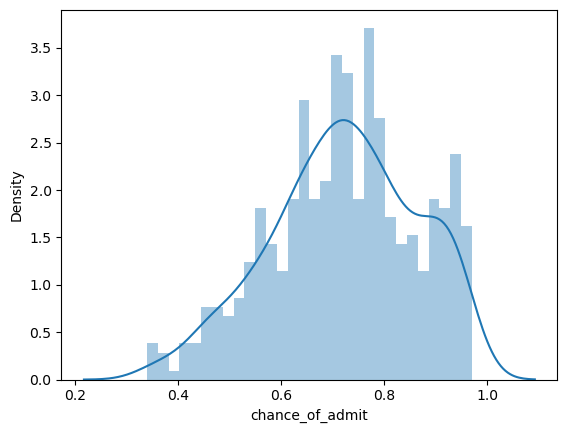

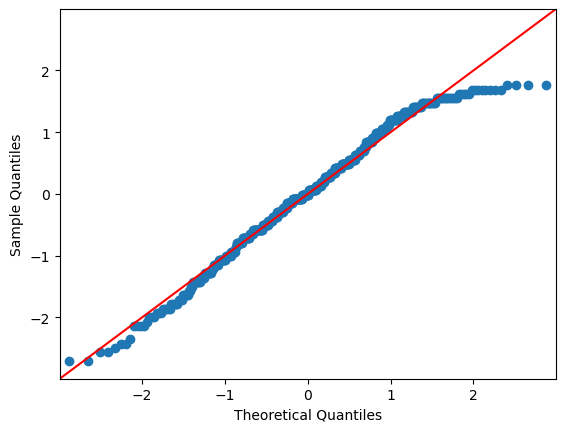

In [67]:
sns.distplot(df["chance_of_admit"],bins = 30)
sm.qqplot(df["chance_of_admit"],fit=True, line="45")
plt.show()

# sns.distplot(df["gre_score"], bins = 30)
# sm.qqplot(df["gre_score"],fit=True, line="45")
# plt.show()


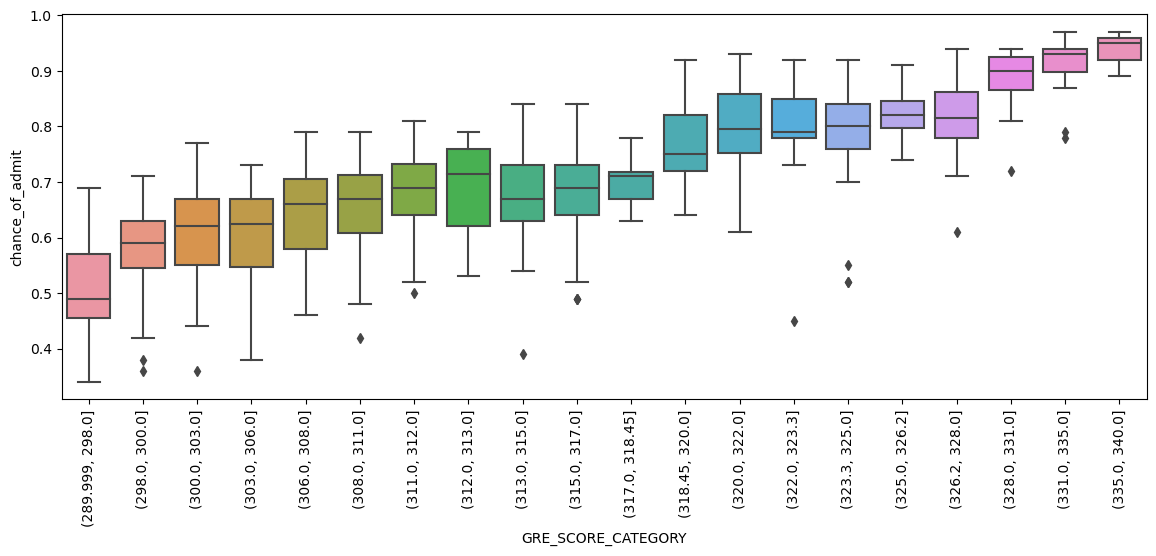

In [33]:
df["GRE_SCORE_CATEGORY"]=pd.qcut(df["gre_score"],20)
plt.figure(figsize=(14,5))
sns.boxplot(y = df["chance_of_admit"], x = df["GRE_SCORE_CATEGORY"])
plt.xticks(rotation = 90)
plt.show()

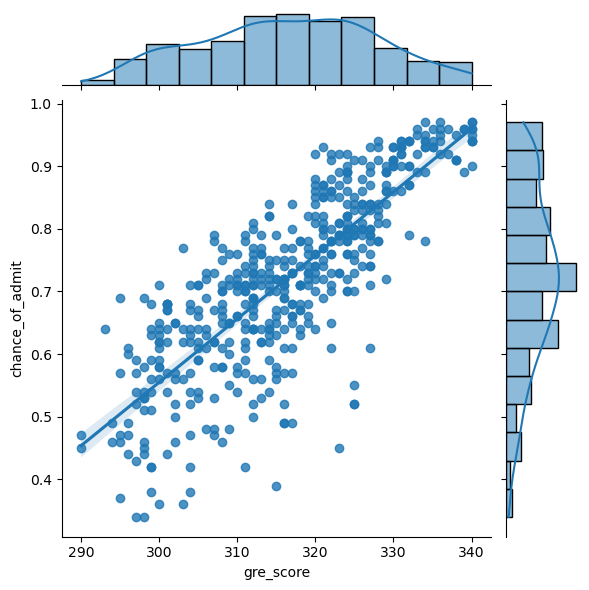

In [40]:
sns.jointplot(x="gre_score", y="chance_of_admit", data=df, kind="reg")

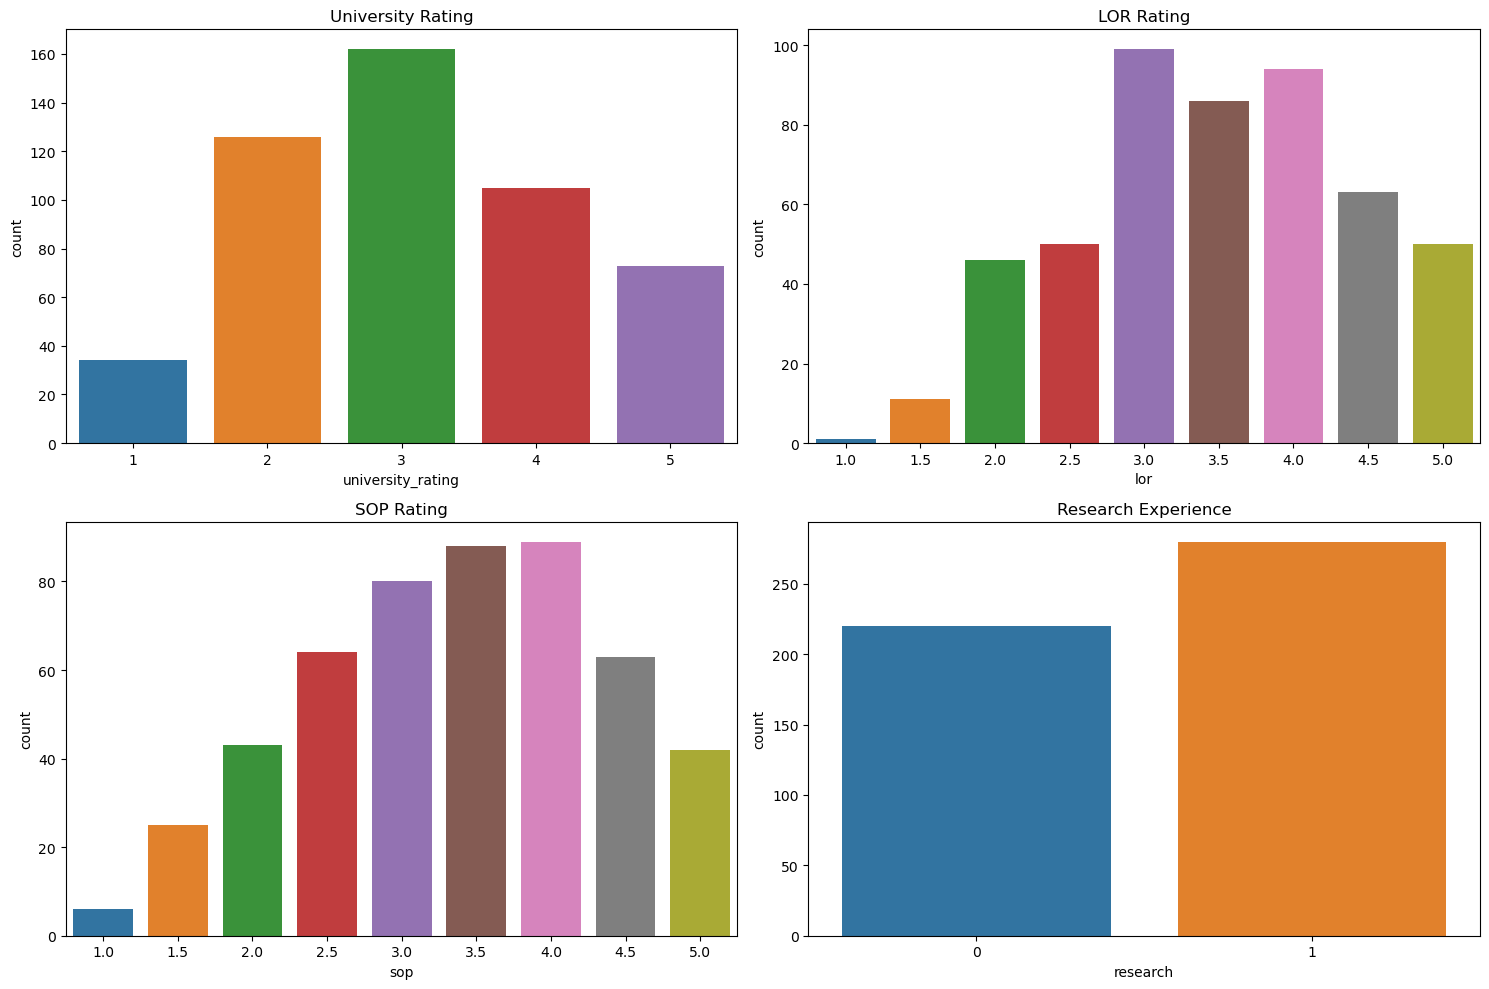

In [44]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15, 10))

plt.subplot(2, 2, 1)
sns.countplot(x="university_rating", data=df)
plt.title("University Rating")

plt.subplot(2, 2, 2)
sns.countplot(x="lor", data=df)
plt.title("LOR Rating")

plt.subplot(2, 2, 3)
sns.countplot(x="sop", data=df)
plt.title("SOP Rating")

plt.subplot(2, 2, 4)
sns.countplot(x="research", data=df)
plt.title("Research Experience")

plt.tight_layout()
plt.show()


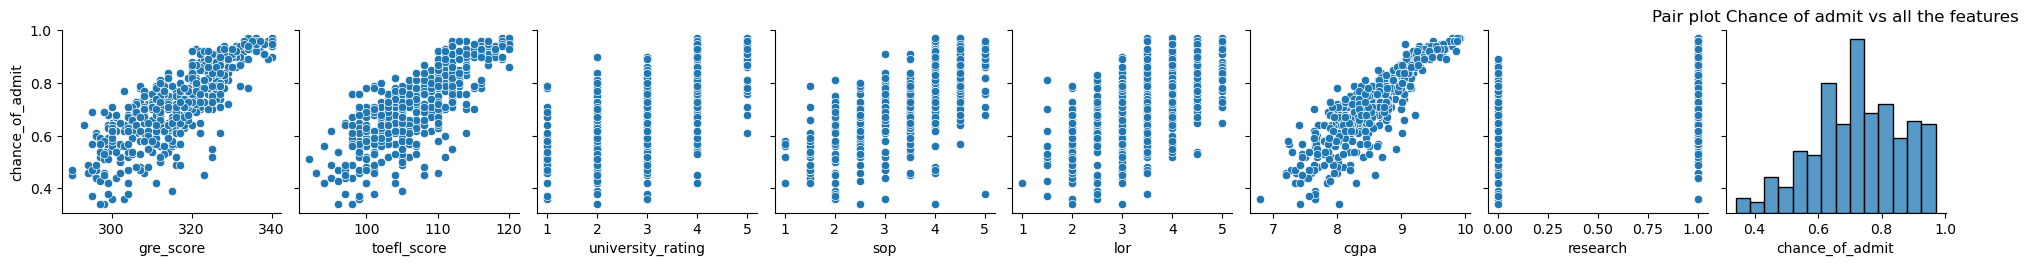

In [46]:
sns.pairplot(df,y_vars = ["chance_of_admit"])
plt.title("Pair plot Chance of admit vs all the features")
plt.show()

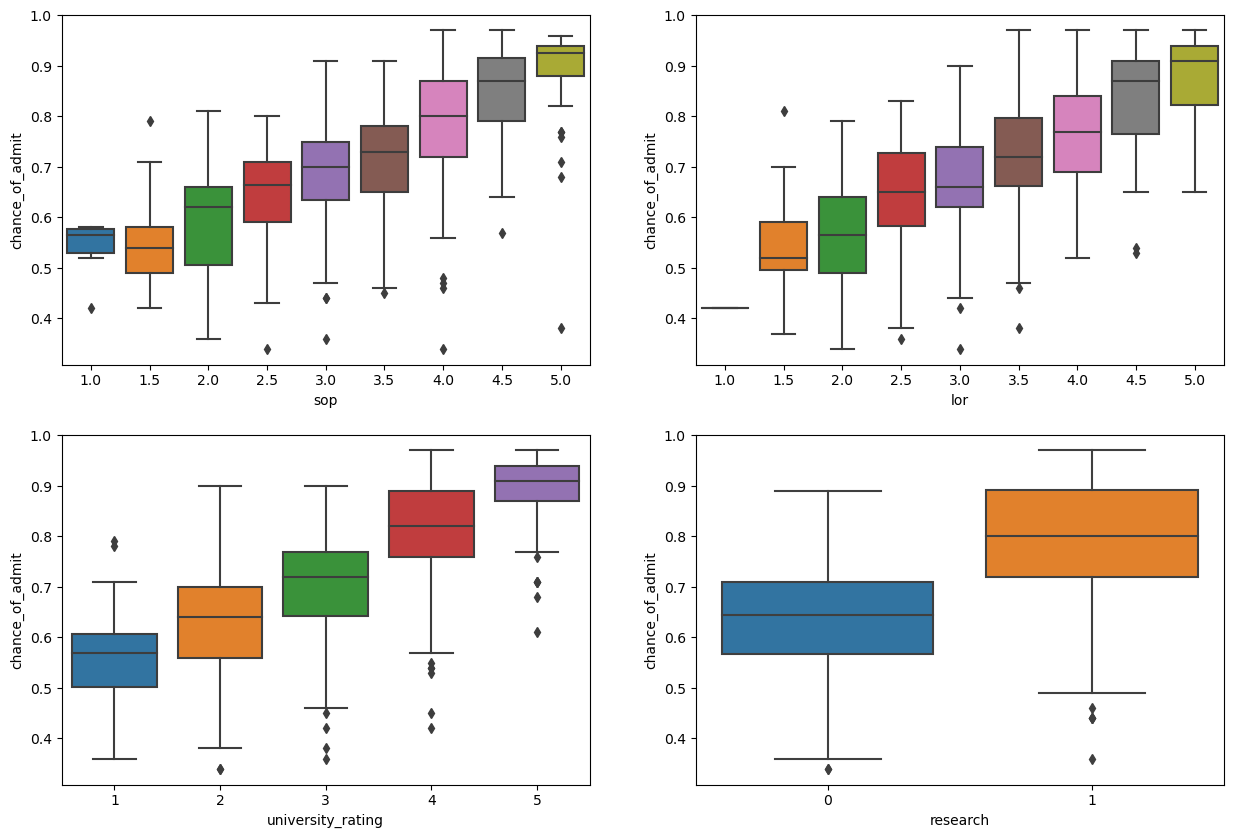

In [48]:
plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
sns.boxplot(y = df["chance_of_admit"], x = df["sop"])
plt.subplot(2,2,2)
sns.boxplot(y = df["chance_of_admit"], x = df["lor"])
plt.subplot(2,2,3)
sns.boxplot(y = df["chance_of_admit"], x = df["university_rating"])
plt.subplot(2,2,4)
sns.boxplot(y = df["chance_of_admit"], x = df["research"])
plt.show()


In [52]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error, adjusted_mutual_info_score
from sklearn.feature_selection import f_regression

In [65]:
X = df.drop(["chance_of_admit"],axis = 1) # independent variables
y = df["chance_of_admit"].values.reshape(-1,1) # target / dependent variables

In [66]:
standardizer = StandardScaler()
standardizer.fit(X)
x = standardizer.transform(X) # standardising the data

In [70]:
X_train , X_test, y_train , y_test = train_test_split(x,y, test_size = 0.2) # test train split 
X_train.shape,X_test.shape, y_train.shape, y_test.shape # after spliting, checking for the shape of test and train data

((400, 7), (100, 7), (400, 1), (100, 1))

In [71]:
LinearRegression = LinearRegression() # training LinearRegression model
LinearRegression.fit(X_train,y_train)

LinearRegression()

In [72]:
r2_score(y_test,LinearRegression.predict(X_test) )

0.8474441673519006

In [73]:
ws = pd.DataFrame(LinearRegression.coef_.reshape(1,-1),columns=df.columns[:-1])
ws["Intercept"] = LinearRegression.intercept_
ws

,gre_score,toefl_score,university_rating,sop,lor,cgpa,research,Intercept
0,0.019392,0.021328,0.008967,-0.001866,0.015185,0.068806,0.013684,0.720735


In [82]:
def AdjustedR2score(R2,n,d):
    return 1-(((1-R2)*(n-1))/(n-d-1))

In [83]:
y_pred = LinearRegression.predict(X_test)
print("MSE:",mean_squared_error(y_test,y_pred)) # MSE
print("RMSE:",np.sqrt(mean_squared_error(y_test,y_pred))) #RMSE
print("MAE :",mean_absolute_error(y_test,y_pred) ) # MAE
print("r2_score:",r2_score(y_test,y_pred)) # r2score
print("Adjusted R2 score :", AdjustedR2score(r2_score(y_test,y_pred),len(X),X.shape[1])) # adjusted R2 score

MSE: 0.0032766307870157134
RMSE: 0.05724186219032111
MAE : 0.04284030816658341
r2_score: 0.8474441673519006
Adjusted R2 score : 0.8452736575378017


In [84]:
from sklearn.linear_model import Ridge # L2 regualrization
from sklearn.linear_model import Lasso # L1 regualrization
from sklearn.linear_model import ElasticNet

In [85]:
## Hyperparameter Tuning : for appropriate lambda value :
train_R2_score = []
test_R2_score = []
lambdas = []
train_test_difference_Of_R2 = []
lambda_ = 0
while lambda_ <= 5:
 lambdas.append(lambda_)
 RidgeModel = Ridge(lambda_)
 RidgeModel.fit(X_train,y_train)
 trainR2 = RidgeModel.score(X_train,y_train)
 testR2 = RidgeModel.score(X_test,y_test)
 train_R2_score.append(trainR2)
 test_R2_score.append(testR2)

 lambda_ += 0.01

Text(0.5, 0, 'Alpha (Lambda)')

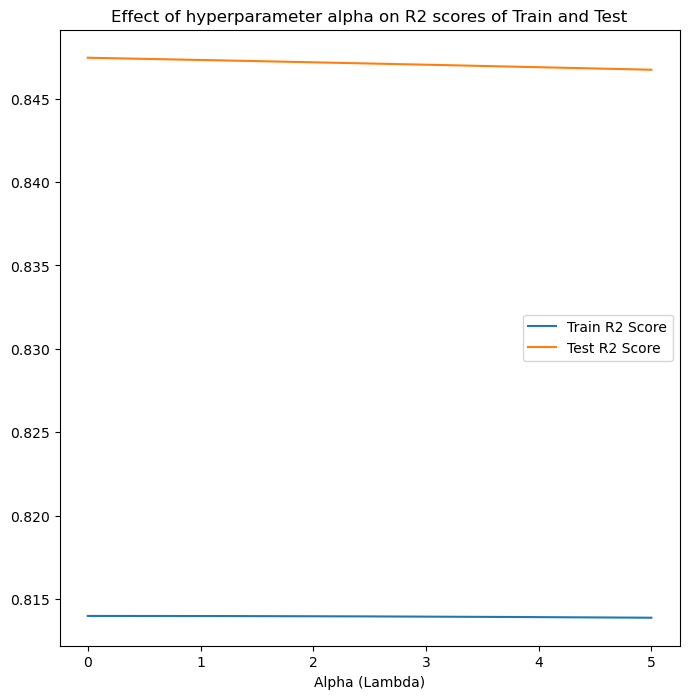

In [88]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 8))

sns.lineplot(x=lambdas, y=train_R2_score, label='Train R2 Score')
sns.lineplot(x=lambdas, y=test_R2_score, label='Test R2 Score')

plt.legend()
plt.title("Effect of hyperparameter alpha on R2 scores of Train and Test")
plt.xlabel("Alpha (Lambda)")


In [89]:
RidgeModel = Ridge(alpha = 0.1)
RidgeModel.fit(X_train,y_train)
trainR2 = RidgeModel.score(X_train,y_train)
testR2 = RidgeModel.score(X_test,y_test)

In [90]:
trainR2,testR2

(0.8139973134417274, 0.847431070638297)

In [91]:
RidgeModel.coef_


array([ 0.01941315,  0.02134009,  0.00897262, -0.00184787,  0.0151891 ,
        0.06873958,  0.01368545])

In [92]:
RidgeModel_coefs = pd.DataFrame(RidgeModel.coef_.reshape(1,-1),columns=df.columns[:-1])
RidgeModel_coefs["Intercept"] = RidgeModel.intercept_
RidgeModel_coefs

,gre_score,toefl_score,university_rating,sop,lor,cgpa,research,Intercept
0,0.019413,0.02134,0.008973,-0.001848,0.015189,0.06874,0.013685,0.720735


In [95]:
LinearRegression_Model_coefs

,gre_score,toefl_score,university_rating,sop,lor,cgpa,research,Intercept
0,0.019392,0.021328,0.008967,-0.001866,0.015185,0.068806,0.013684,0.720735


In [96]:
y_pred = RidgeModel.predict(X_test)
print("MSE:",mean_squared_error(y_test,y_pred)) # MSE
print("RMSE:",np.sqrt(mean_squared_error(y_test,y_pred))) #RMSE
print("MAE :",mean_absolute_error(y_test,y_pred) ) # MAE
print("r2_score:",r2_score(y_test,y_pred)) # r2score
print("Adjusted R2 score :", AdjustedR2score(r2_score(y_test,y_pred),len(X),X.shape[1])) # adjusted R2 score

MSE: 0.003276912081373705
RMSE: 0.0572443192061335
MAE : 0.0428439349358985
r2_score: 0.847431070638297
Adjusted R2 score : 0.845260374488842


In [105]:
from scipy import stats


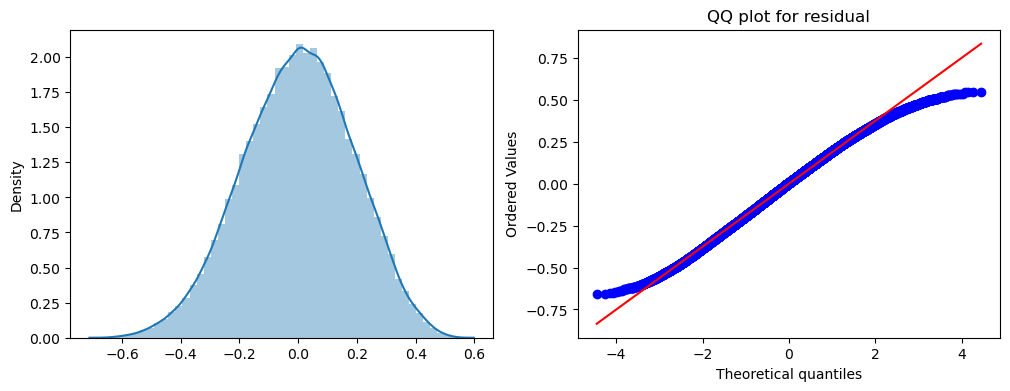

In [106]:
y_predicted = RidgeModel.predict(X_train)
residuals = (y_train - y_predicted)
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
sns.distplot(residuals)
plt.subplot(1,2,2)
stats.probplot(residuals.reshape(-1,), plot = plt)
plt.title('QQ plot for residual')
plt.show()


In [98]:
## Hyperparameter Tuning : for appropriate lambda value :
train_R2_score = []
test_R2_score = []
lambdas = []
train_test_difference_Of_R2 = []
lambda_ = 0
while lambda_ <= 5:
 lambdas.append(lambda_)
 ElasticNet_model = ElasticNet(alpha=lambda_)
 ElasticNet_model.fit(X_train , y_train)
 trainR2 = ElasticNet_model.score(X_train,y_train)
 testR2 = ElasticNet_model.score(X_test,y_test)
 train_R2_score.append(trainR2)
 test_R2_score.append(testR2)

 lambda_ += 0.001

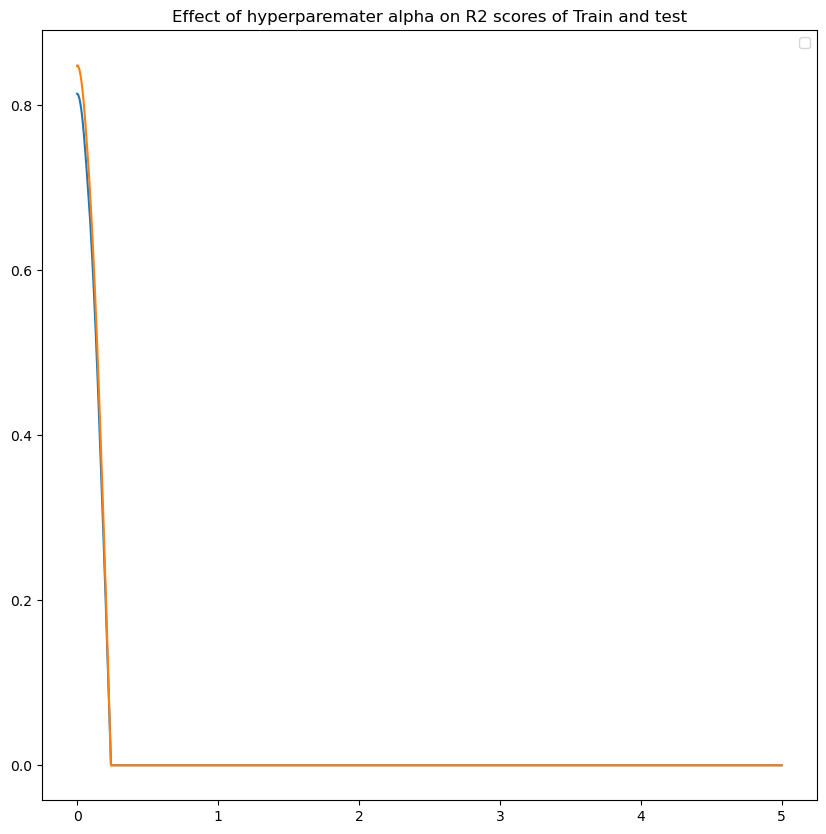

In [101]:
plt.figure(figsize = (10,10))

sns.lineplot(x=lambdas, y=train_R2_score, label='Train R2 Score')
sns.lineplot(x=lambdas, y=test_R2_score, label='Test R2 Score')

plt.legend('Train R2 Score','Test R2 score')
plt.title("Effect of hyperparemater alpha on R2 scores of Train and test")
plt.show()

In [118]:
LassoModel = Lasso(alpha=0.001)
LassoModel.fit(X_train , y_train)
trainR2 = LassoModel.score(X_train,y_train)
testR2 = LassoModel.score(X_test,y_test)
trainR2,testR2

(0.8138509596628304, 0.8485319532522135)

In [119]:
Lasso_Model_coefs = pd.DataFrame(LassoModel.coef_.reshape(1,-1),columns=df.columns[:-1])
Lasso_Model_coefs["Intercept"] = LassoModel.intercept_
Lasso_Model_coefs

,gre_score,toefl_score,university_rating,sop,lor,cgpa,research,Intercept
0,0.019332,0.020772,0.007958,0.0,0.014238,0.068565,0.013121,0.720717


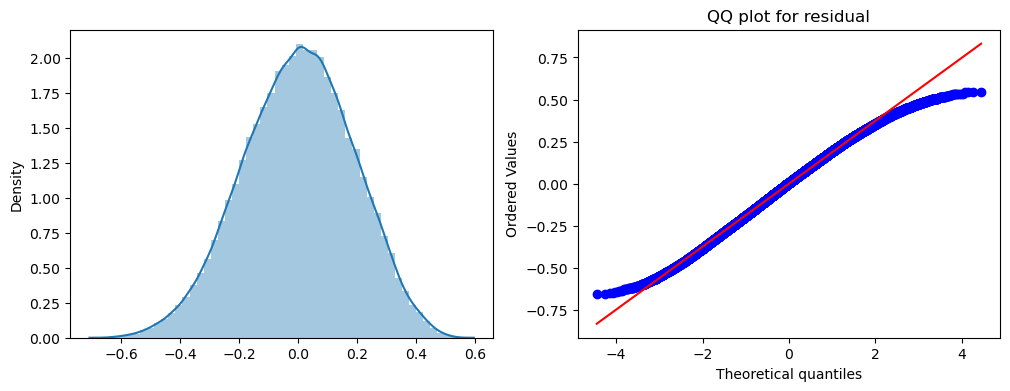

In [120]:
y_predicted = LassoModel.predict(X_train)
residuals = (y_train - y_predicted)
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
sns.distplot(residuals)
plt.subplot(1,2,2)
stats.probplot(residuals.reshape(-1,), plot = plt)
plt.title('QQ plot for residual')
plt.show()

In [121]:
y_pred = LassoModel.predict(X_test)
print("MSE:",mean_squared_error(y_test,y_pred)) # MSE
print("RMSE:",np.sqrt(mean_squared_error(y_test,y_pred))) #RMSE
print("MAE :",mean_absolute_error(y_test,y_pred) ) # MAE
print("r2_score:",r2_score(y_test,y_pred)) # r2score
print("Adjusted R2 score :", AdjustedR2score(r2_score(y_test,y_pred),len(X),X.shape[1])) # adjusted R2 score

MSE: 0.0032532670603801785
RMSE: 0.057037418072526554
MAE : 0.0427359435914732
r2_score: 0.8485319532522135
Adjusted R2 score : 0.8463769200667776


In [102]:
ElasticNet_model = ElasticNet(alpha=0.001)
ElasticNet_model.fit(X_train , y_train)
trainR2 = ElasticNet_model.score(X_train,y_train)
testR2 = ElasticNet_model.score(X_test,y_test)

In [103]:
trainR2,testR2

(0.8139136126561637, 0.8484721696409268)

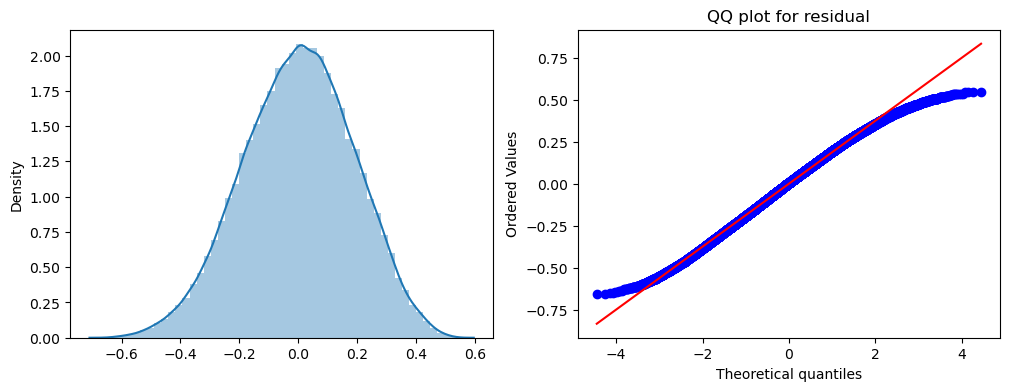

In [107]:
y_predicted = ElasticNet_model.predict(X_train)
residuals = (y_train - y_predicted)
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
sns.distplot(residuals)
plt.subplot(1,2,2)
stats.probplot(residuals.reshape(-1,), plot = plt)
plt.title('QQ plot for residual')
plt.show()


In [108]:
y_pred = ElasticNet_model.predict(X_test)
print("MSE:",mean_squared_error(y_test,y_pred)) # MSE
print("RMSE:",np.sqrt(mean_squared_error(y_test,y_pred))) #RMSE
print("MAE :",mean_absolute_error(y_test,y_pred) ) # MAE
print("r2_score:",r2_score(y_test,y_pred)) # r2score
print("Adjusted R2 score :", AdjustedR2score(r2_score(y_test,y_pred),len(X),X.shape[1])) # adjusted R2 score

MSE: 0.003254551107131461
RMSE: 0.057048673140849306
MAE : 0.042774455796623444
r2_score: 0.8484721696409268
Adjusted R2 score : 0.8463162858756554


In [109]:
ElasticNet_model_coefs = pd.DataFrame(ElasticNet_model.coef_.reshape(1,-1),columns=df.columns[:-1])
ElasticNet_model_coefs["Intercept"] = ElasticNet_model.intercept_
ElasticNet_model_coefs


,gre_score,toefl_score,university_rating,sop,lor,cgpa,research,Intercept
0,0.019438,0.020951,0.008124,-0.0,0.014505,0.068374,0.013405,0.720712


In [110]:
y_pred = ElasticNet_model.predict(X_test)
ElasticNet_model_metrics = []
ElasticNet_model_metrics.append(mean_squared_error(y_test,y_pred)) # MSE
ElasticNet_model_metrics.append(np.sqrt(mean_squared_error(y_test,y_pred))) #RMSE
ElasticNet_model_metrics.append(mean_absolute_error(y_test,y_pred) ) # MAE
ElasticNet_model_metrics.append(r2_score(y_test,y_pred)) # r2score
ElasticNet_model_metrics.append(AdjustedR2score(r2_score(y_test,y_pred),len(X),X.shape[1])) # adjusted R2 score


In [111]:
y_pred = LinearRegression.predict(X_test)
LinearRegression_model_metrics = []
LinearRegression_model_metrics.append(mean_squared_error(y_test,y_pred)) # MSE
LinearRegression_model_metrics.append(np.sqrt(mean_squared_error(y_test,y_pred))) #RMSE
LinearRegression_model_metrics.append(mean_absolute_error(y_test,y_pred) ) # MAE
LinearRegression_model_metrics.append(r2_score(y_test,y_pred)) # r2score
LinearRegression_model_metrics.append(AdjustedR2score(r2_score(y_test,y_pred),len(X),X.shape[1])) # adjusted R2 score

In [112]:
y_pred = RidgeModel.predict(X_test)
RidgeModel_model_metrics = []
RidgeModel_model_metrics.append(mean_squared_error(y_test,y_pred)) # MSE
RidgeModel_model_metrics.append(np.sqrt(mean_squared_error(y_test,y_pred))) #RMSE
RidgeModel_model_metrics.append(mean_absolute_error(y_test,y_pred) ) # MAE
RidgeModel_model_metrics.append(r2_score(y_test,y_pred)) # r2score
RidgeModel_model_metrics.append(AdjustedR2score(r2_score(y_test,y_pred),len(X),X.shape[1])) # adjusted R2 score


In [122]:
y_pred = LassoModel.predict(X_test)
LassoModel_model_metrics = []
LassoModel_model_metrics.append(mean_squared_error(y_test,y_pred)) # MSE
LassoModel_model_metrics.append(np.sqrt(mean_squared_error(y_test,y_pred))) #RMSE
LassoModel_model_metrics.append(mean_absolute_error(y_test,y_pred) ) # MAE
LassoModel_model_metrics.append(r2_score(y_test,y_pred)) # r2score
LassoModel_model_metrics.append(AdjustedR2score(r2_score(y_test,y_pred),len(X),X.shape[1])) # adjusted R2 score


In [124]:
RidgeModel_model_metrics

[0.003276912081373705,
 0.0572443192061335,
 0.0428439349358985,
 0.847431070638297,
 0.845260374488842]

In [133]:
A = pd.DataFrame([LinearRegression_model_metrics,LassoModel_model_metrics,RidgeModel_model_metrics,ElasticNet_model_metrics],columns=["MSE","RMSE","MAE","R2_SCORE","ADJUSTED_R2"], index=["Linear Regression Model","Lasso Regression Model","Ridge Regression Model","ElasticNet Regression Model"])
A

,MSE,RMSE,MAE,R2_SCORE,ADJUSTED_R2
Linear Regression Model,0.003277,0.057242,0.042840,0.847444,0.845274
Lasso Regression Model,0.003253,0.057037,0.042736,0.848532,0.846377
Ridge Regression Model,0.003277,0.057244,0.042844,0.847431,0.845260
ElasticNet Regression Model,0.003255,0.057049,0.042774,0.848472,0.846316


In [134]:
B = pd.DataFrame(LinearRegression_Model_coefs.append(Lasso_Model_coefs).append(RidgeModel_coefs).append(ElasticNet_model_coefs))
B.index = ["Linear Regression Model","Lasso Regression Model","Ridge Regression Model","ElasticNet Regression Model"]


In [136]:
REPORT = B.reset_index().merge(A.reset_index())
REPORT

,index,gre_score,toefl_score,university_rating,sop,lor,cgpa,research,Intercept,MSE,RMSE,MAE,R2_SCORE,ADJUSTED_R2
0,Linear Regression Model,0.019392,0.021328,0.008967,-0.001866,0.015185,0.068806,0.013684,0.720735,0.003277,0.057242,0.042840,0.847444,0.845274
1,Lasso Regression Model,0.019332,0.020772,0.007958,0.000000,0.014238,0.068565,0.013121,0.720717,0.003253,0.057037,0.042736,0.848532,0.846377
2,Ridge Regression Model,0.019413,0.021340,0.008973,-0.001848,0.015189,0.068740,0.013685,0.720735,0.003277,0.057244,0.042844,0.847431,0.845260
3,ElasticNet Regression Model,0.019438,0.020951,0.008124,-0.000000,0.014505,0.068374,0.013405,0.720712,0.003255,0.057049,0.042774,0.848472,0.846316


In [137]:
REPORT = REPORT.set_index("index")
REPORT

,gre_score,toefl_score,university_rating,sop,lor,cgpa,research,Intercept,MSE,RMSE,MAE,R2_SCORE,ADJUSTED_R2
index,,,,,,,,,,,,,
Linear Regression Model,0.019392,0.021328,0.008967,-0.001866,0.015185,0.068806,0.013684,0.720735,0.003277,0.057242,0.042840,0.847444,0.845274
Lasso Regression Model,0.019332,0.020772,0.007958,0.000000,0.014238,0.068565,0.013121,0.720717,0.003253,0.057037,0.042736,0.848532,0.846377
Ridge Regression Model,0.019413,0.021340,0.008973,-0.001848,0.015189,0.068740,0.013685,0.720735,0.003277,0.057244,0.042844,0.847431,0.845260
ElasticNet Regression Model,0.019438,0.020951,0.008124,-0.000000,0.014505,0.068374,0.013405,0.720712,0.003255,0.057049,0.042774,0.848472,0.846316


<Axes: xlabel='ElasticNet Regression Model'>

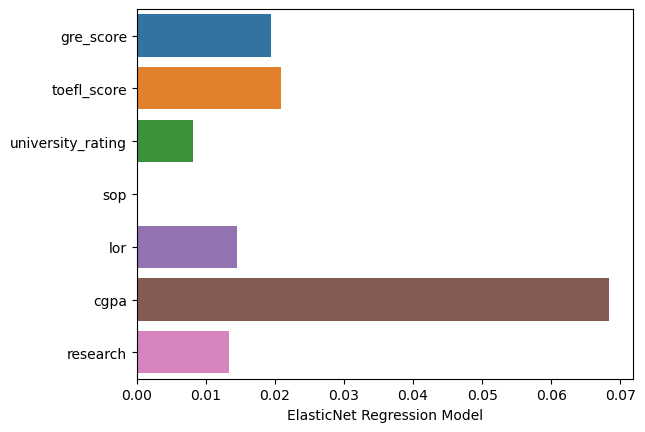

In [140]:
sns.barplot(y = REPORT.loc["ElasticNet Regression Model"][0:7].index,
 x = REPORT.loc["ElasticNet Regression Model"][0:7])